# <b>Assignment : DT</b>

<font color='red'><b> Please check below video before attempting this assignment</b></font>

In [1]:
# from IPython.display import YouTubeVideo
# YouTubeVideo('ZhLXULFjIjQ', width="1000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
glove_vectors = '/content/drive/MyDrive/9_Donors_choose_DT/glove_vectors'

In [4]:
#please use below code to load glove vectors 
import pickle

with open(glove_vectors, 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

or else , you can use below code

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

In [5]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('/content/drive/MyDrive/9_Donors_choose_DT/preprocessed_data.csv', nrows=50000)

In [7]:
data.shape

(50000, 9)

In [8]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [9]:
data.isnull().sum()

school_state                                    0
teacher_prefix                                  0
project_grade_category                          0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
clean_categories                                0
clean_subcategories                             0
essay                                           0
price                                           0
dtype: int64

In [10]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from collections import Counter

# Sentiment Scores

In [11]:

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# import nltk
# nltk.download('vader_lexicon')

In [13]:
neg = []
pos = []
neu = []
compound = []

for a in tqdm(data["essay"]) :
    b = analyser.polarity_scores(a)['neg']
    c = analyser.polarity_scores(a)['pos']
    d = analyser.polarity_scores(a)['neu']
    e = analyser.polarity_scores(a)['compound']
    neg.append(b)
    pos.append(c)
    neu.append(d)
    compound.append(e)

data['pos'] =pos
data['neg'] =neg
data['neu'] = neu
data['compound'] = compound


100%|██████████| 50000/50000 [07:15<00:00, 114.73it/s]


In [14]:
data.shape

(50000, 13)

In [15]:

features =data.copy().drop(['project_is_approved'],axis=1)
y=data['project_is_approved']

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train_1, y_test = train_test_split(features, y, stratify=y, test_size=0.25)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train_1, test_size=0.33, stratify=y_train_1)

In [17]:
x_train.shape

(25125, 12)

In [19]:
x_test['pos'].head()

976      0.335
6911     0.223
4430     0.215
16535    0.165
35865    0.198
Name: pos, dtype: float64

In [18]:
data.groupby('project_is_approved').count()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,pos,neg,neu,compound
project_is_approved,,,,,,,,,,,,
0,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007,8007
1,41993,41993,41993,41993,41993,41993,41993,41993,41993,41993,41993,41993


In [20]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2))

x_train_essay_tfidf = vectorizer_tfidf.fit_transform(x_train['essay'].values) # fit has to happen on only train data
x_cv_essay_tfidf = vectorizer_tfidf.transform(x_cv['essay'].values) # fit has to happen on only train data
x_test_essay_tfidf = vectorizer_tfidf.transform(x_test['essay'].values)


In [ ]:
print(x_train_essay_tfidf.shape)
print(x_cv_essay_tfidf.shape)
print(x_test_essay_tfidf.shape)

(25125, 956813)
(12375, 956813)
(12500, 956813)


In [21]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' for tfidf-w2vec

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer()
tfidf_model.fit(x_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [22]:
# average Word2Vec
# compute average word2vec for each review.
x_train_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_essay_tfidf_w2v.append(vector)

print(len(x_train_essay_tfidf_w2v))
print(len(x_train_essay_tfidf_w2v[0]))

100%|██████████| 25125/25125 [00:57<00:00, 440.21it/s]

25125
300


In [23]:
# average Word2Vec
# compute average word2vec for each review.
x_cv_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_cv['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_cv_essay_tfidf_w2v.append(vector)

print(len(x_cv_essay_tfidf_w2v))
print(len(x_cv_essay_tfidf_w2v[0]))

100%|██████████| 12375/12375 [00:27<00:00, 445.09it/s]

12375
300


In [24]:
# average Word2Vec
# compute average word2vec for each review.
x_test_essay_tfidf_w2v = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_essay_tfidf_w2v.append(vector)

print(len(x_test_essay_tfidf_w2v))
print(len(x_test_essay_tfidf_w2v[0]))


100%|██████████| 12500/12500 [00:28<00:00, 442.46it/s]

12500
300


In [25]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

vectorizer1 = CountVectorizer()
x_train_school_ohe = vectorizer1.fit_transform(x_train['school_state'].values)
x_cv_school_ohe = vectorizer1.transform(x_cv['school_state'].values)
x_test_school_ohe = vectorizer1.transform(x_test['school_state'].values)

vectorizer2 = CountVectorizer()
x_train_teacher_ohe = vectorizer2.fit_transform(x_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer2.transform(x_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer2.transform(x_test['teacher_prefix'].values)

vectorizer3 = CountVectorizer()
x_train_grade_ohe = vectorizer3.fit_transform(x_train['project_grade_category'].values)
x_cv_grade_ohe = vectorizer3.transform(x_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer3.transform(x_test['project_grade_category'].values)

vectorizer4 = CountVectorizer()
x_train_clean_category_ohe = vectorizer4.fit_transform(x_train['clean_categories'].values)
x_cv_clean_category_ohe = vectorizer4.transform(x_cv['clean_categories'].values)
x_test_clean_category_ohe = vectorizer4.transform(x_test['clean_categories'].values)

vectorizer5 = CountVectorizer()
x_train_clean_subcategory_ohe = vectorizer5.fit_transform(x_train['clean_subcategories'].values)
x_cv_clean_subcategory_ohe = vectorizer5.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcategory_ohe = vectorizer5.transform(x_test['clean_subcategories'].values)


In [26]:
print(x_train_school_ohe.shape, x_cv_school_ohe.shape, x_test_school_ohe.shape)
print(x_train_teacher_ohe.shape, x_cv_teacher_ohe.shape, x_test_teacher_ohe.shape)
print(x_train_grade_ohe.shape, x_cv_grade_ohe.shape, x_test_grade_ohe.shape)
print(x_train_clean_category_ohe.shape, x_cv_clean_category_ohe.shape, x_test_clean_category_ohe.shape)
print(x_train_clean_subcategory_ohe.shape, x_cv_clean_subcategory_ohe.shape, x_test_clean_subcategory_ohe.shape)

(25125, 51) (12375, 51) (12500, 51)
(25125, 5) (12375, 5) (12500, 5)
(25125, 4) (12375, 4) (12500, 4)
(25125, 7) (12375, 7) (12500, 7)
(25125, 28) (12375, 28) (12500, 28)


In [27]:
# Numerical encoding

from sklearn.preprocessing import Normalizer

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
# -1 means you don't need to specify the dimension number or it will automatically input remaining dimensions
normalizer = Normalizer()
x_train_price_norm = normalizer.fit_transform(x_train['price'].values.reshape(-1,1))
x_cv_price_norm = normalizer.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_norm = normalizer.transform(x_test['price'].values.reshape(-1,1))

normalizer2 = Normalizer()
x_train_posts_norm = normalizer2.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv_posts_norm = normalizer2.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_posts_norm = normalizer2.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


In [28]:
print(x_train['compound'].shape)

print(' To change to an array we use \'.values.reshape(-1,1)\'')

comp = x_train['compound'].values.reshape(-1,1)
print(comp.shape)

(25125,)
 To change to an array we use '.values.reshape(-1,1)'
(25125, 1)


**Sparse data for tfidf data**


In [29]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr_tf = hstack((x_train['pos'].values.reshape(-1,1),x_train['neg'].values.reshape(-1,1), x_train['neu'].values.reshape(-1,1), x_train['compound'].values.reshape(-1,1), \
                  x_train_essay_tfidf, x_train_school_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_clean_category_ohe, x_train_clean_subcategory_ohe, \
                  x_train_price_norm, x_train_posts_norm)).tocsr()
x_cv_tf= hstack((x_cv['pos'].values.reshape(-1,1),x_cv['neg'].values.reshape(-1,1), x_cv['neu'].values.reshape(-1,1), x_cv['compound'].values.reshape(-1,1), \
                 x_cv_essay_tfidf, x_cv_school_ohe, x_cv_teacher_ohe, x_cv_grade_ohe, x_cv_clean_category_ohe, x_cv_clean_subcategory_ohe, \
                 x_cv_price_norm, x_cv_posts_norm)).tocsr()
x_te_tf = hstack((x_test['pos'].values.reshape(-1,1),x_test['neg'].values.reshape(-1,1), x_test['neu'].values.reshape(-1,1), x_test['compound'].values.reshape(-1,1), \
                  x_test_essay_tfidf, x_test_school_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_clean_category_ohe, x_test_clean_subcategory_ohe, \
                  x_test_price_norm, x_test_posts_norm)).tocsr()

print(x_tr_tf.shape, y_train.shape)
print(x_cv_tf.shape, y_cv.shape)
print(x_te_tf.shape, y_test.shape)

(25125, 956808) (25125,)
(12375, 956808) (12375,)
(12500, 956808) (12500,)


**Sparse data for tfidf weigthed w2vec data**




In [30]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
x_tr_tf_w2vec = hstack((x_train['pos'].values.reshape(-1,1), x_train['neg'].values.reshape(-1,1), x_train['neu'].values.reshape(-1,1), x_train['compound'].values.reshape(-1,1), \
                        x_train_essay_tfidf_w2v, x_train_school_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_clean_category_ohe, x_train_clean_subcategory_ohe, \
                        x_train_price_norm, x_train_posts_norm)).tocsr()
x_cv_tf_w2vec= hstack((x_cv['pos'].values.reshape(-1,1),x_cv['neg'].values.reshape(-1,1), x_cv['neu'].values.reshape(-1,1), x_cv['compound'].values.reshape(-1,1), \
                       x_cv_essay_tfidf_w2v, x_cv_school_ohe, x_cv_teacher_ohe, x_cv_grade_ohe, x_cv_clean_category_ohe, x_cv_clean_subcategory_ohe, \
                       x_cv_price_norm, x_cv_posts_norm)).tocsr()
x_te_tf_w2vec = hstack((x_test['pos'].values.reshape(-1,1),x_test['neg'].values.reshape(-1,1), x_test['neu'].values.reshape(-1,1), x_test['compound'].values.reshape(-1,1), \
                        x_test_essay_tfidf_w2v, x_test_school_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_clean_category_ohe, x_test_clean_subcategory_ohe, \
                        x_test_price_norm, x_test_posts_norm)).tocsr()

print(x_tr_tf_w2vec.shape, y_train.shape)
print(x_cv_tf_w2vec.shape, y_cv.shape)
print(x_te_tf_w2vec.shape, y_test.shape)

(25125, 401) (25125,)
(12375, 401) (12375,)
(12500, 401) (12500,)


# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [ ]:
# import nltk
# nltk.download('vader_lexicon')

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [31]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
#data = pandas.read_csv('preprocessed_data.csv')

In [ ]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [ ]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [32]:
#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [33]:
# function to collect prediction

def collect_prediction(prob, threshould, fpr, tpr):
    predictions = []
    t = threshould[np.argmax(fpr*(1-tpr))]
    for i in prob:
        if(i>=t):
            predictions.append(1)
        else:
            predictions.append(0)  
    return predictions

In [34]:
# function to collect fpr
def collect_fpr(y_test, predictions):
    fpr = []
    for i in range(len(y_test)):
        if(y_test[i] == 0 and predictions[i]==1):
            fpr.append(i)
    return fpr

# Model - 1
# Hyper-parameter tuning on tfidf dataset

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model_params = {'max_depth': randint(4,100), 'min_samples_split': randint(5, 100)}
dt = DecisionTreeClassifier(class_weight='balanced')
#parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split':[5, 10, 15]}
clf= RandomizedSearchCV(dt, model_params, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf.fit(x_tr_tf, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6a8d901d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6aad984d0>},
                   return_train_score=True, scoring='roc_auc')

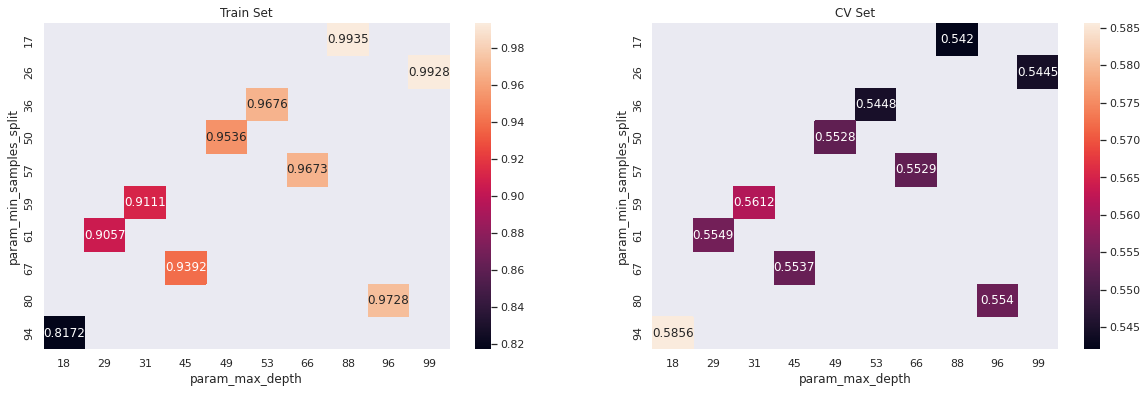

In [36]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [37]:
# Print params
print(clf.best_estimator_)
print(clf.score(x_tr_tf, y_train))
print(clf.score(x_cv_tf, y_cv))

DecisionTreeClassifier(class_weight='balanced', max_depth=18,
                       min_samples_split=94)
0.816717796704585
0.5606557837044513


In [39]:
from scipy.sparse import vstack # for vertical stacking
x1 = vstack((x_tr_tf,x_cv_tf)).tocsr()
print(x1.shape)
print(y_train_1.shape)

(37500, 956808)
(37500,)


In [44]:
# parameters were taken from 1st hypermater tunong model

dt1 = DecisionTreeClassifier(class_weight='balanced',max_depth =18, min_samples_split =94)
dt1.fit(x1, y_train_1)

DecisionTreeClassifier(class_weight='balanced', max_depth=18,
                       min_samples_split=94)

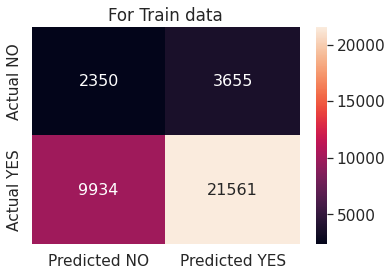

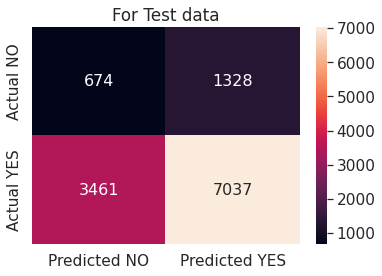

In [45]:
# Confusion Matrix

get_confusion_matrix(dt1,x1,y_train_1)
plt.title('For Train data')
plt.show()

get_confusion_matrix(dt1,x_te_tf,y_test)
plt.title('For Test data')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_1 = dt1.predict_proba(x_te_tf)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_1[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.49639753464291464


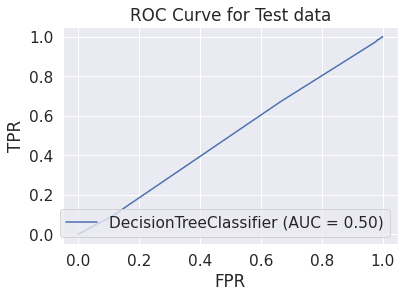

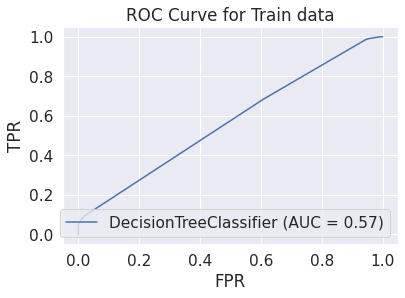

In [47]:
from sklearn import metrics

metrics.plot_roc_curve(dt1, x_te_tf, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(dt1, x1, y_train_1)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# To get false positive data points

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1[:,1])

predictions = collect_prediction(pred_prob_1[:,1], thresholds, fpr, tpr)
print(len(predictions))

y_te = y_test.values.reshape(-1,1)

fpr = collect_fpr(y_te, predictions)
len(fpr)

price = x_test['price'].values.reshape(-1,1)

false_price=[]            # price at false positive data points 
for i in fpr:
    f = price[i]
    false_price.append(f)

print(len(false_price))

fp = np.array(false_price) # since either list of arrrays or dataframe can only be given as data in seaborn


n_project = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

false_projects=[]            # 'teacher_number_of_previously_posted_projects' at false positive data points 
for i in fpr:
    p = n_project[i]
    false_projects.append(p)

project = np.array(false_projects) # since either list of arrrays or dataframe can only be given as data in seaborn



12500
1328


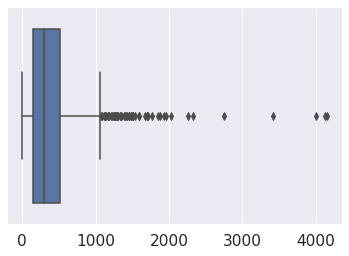

In [49]:
# Box plot for 

import seaborn as sns
sns.boxplot(x= fp)


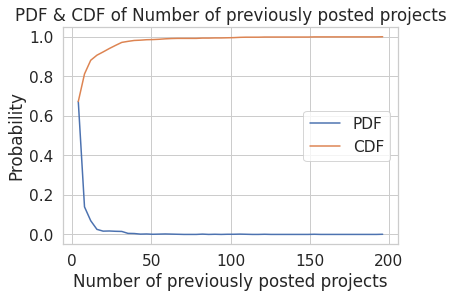

In [50]:
import numpy as np
count, bin_edge = np.histogram(project,bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)

plt.xlabel('Number of previously posted projects')
plt.ylabel('Probability')
plt.title('PDF & CDF of Number of previously posted projects')
plt.legend(('PDF','CDF'))

In [51]:
essay = x_test['essay'].values.reshape(-1,1)

false_essay=[]            # price at false positive data points 
for i in fpr:
    f = essay[i]
    false_essay.append(f)

print(len(false_essay))

f_essay = np.array(false_essay) # since either list of arrrays or dataframe can only be given as data in seaborn


1328


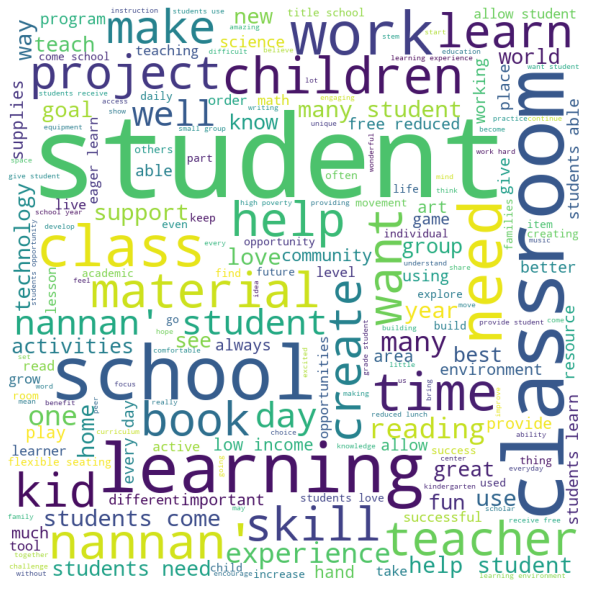

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in f_essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Model - 2
# Hyper-parameter tuning on tfidf weighted w2vec dataset

In [53]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model_params = {'max_depth': randint(4,100), 'min_samples_split': randint(4, 100)}
dt = DecisionTreeClassifier(class_weight='balanced')
#parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split':[5, 10, 15]}
clf2= RandomizedSearchCV(dt, model_params, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf2.fit(x_tr_tf_w2vec, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6a5bba650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6ab335050>},
                   return_train_score=True, scoring='roc_auc')

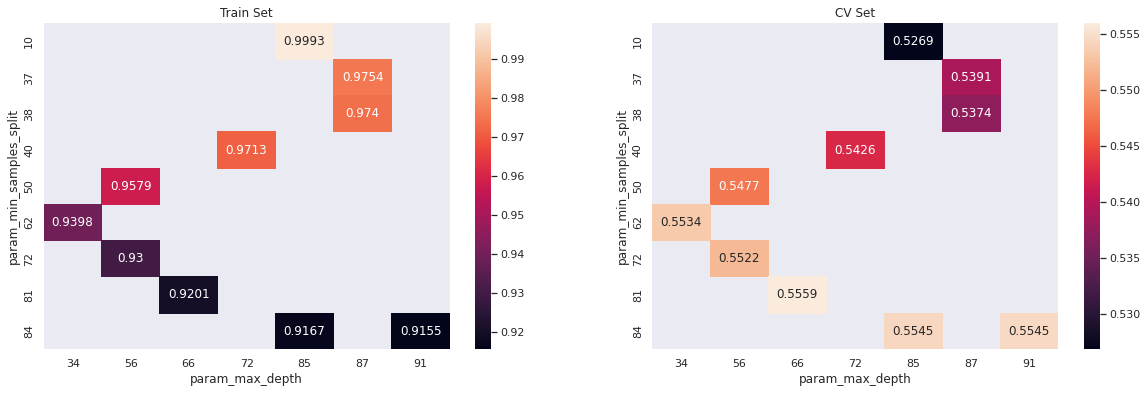

In [54]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf2.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [55]:
# Print params
print(clf2.best_estimator_)
print(clf2.score(x_tr_tf_w2vec, y_train))
print(clf2.score(x_cv_tf_w2vec, y_cv))

DecisionTreeClassifier(class_weight='balanced', max_depth=66,
                       min_samples_split=81)
0.920522887624196
0.544352943449576


In [57]:
from scipy.sparse import vstack # for vertical stacking
x2 = vstack((x_tr_tf_w2vec,x_cv_tf_w2vec)).tocsr()
print(x2.shape)
print(y_train_1.shape)


(37500, 401)
(37500,)


In [58]:
# parameters were taken from 2nd hypermater tuning model

dt2 = DecisionTreeClassifier(class_weight='balanced',max_depth =66, min_samples_split =80)
dt2.fit(x2, y_train_1)

DecisionTreeClassifier(class_weight='balanced', max_depth=66,
                       min_samples_split=80)

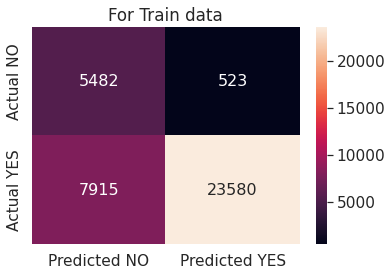

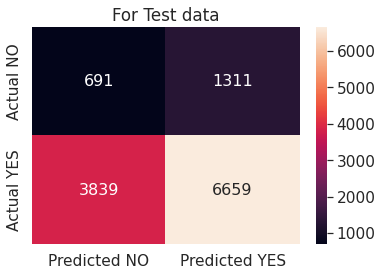

In [59]:
# Confusion Matrix

get_confusion_matrix(dt2,x2, y_train_1)
plt.title('For Train data')
plt.show()
get_confusion_matrix(dt2,x_te_tf_w2vec,y_test)
plt.title('For Test data')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_2 = dt2.predict_proba(x_te_tf_w2vec)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_2[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.4903717448487881


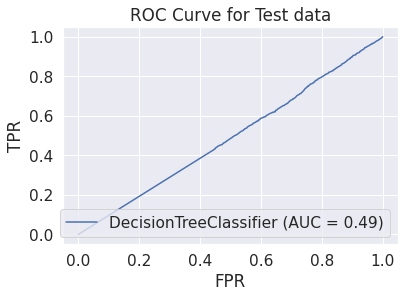

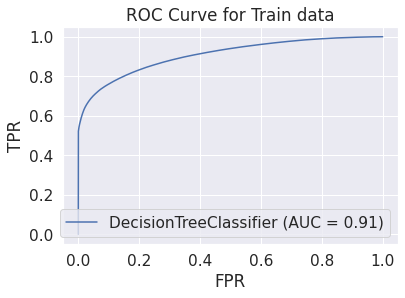

In [61]:
from sklearn import metrics

metrics.plot_roc_curve(dt2, x_te_tf_w2vec, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(dt2, x2, y_train_1)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# To get false positive data points

In [62]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_2[:,1])

predictions = collect_prediction(pred_prob_2[:,1], thresholds, fpr, tpr)
print(len(predictions))

y_te = y_test.values.reshape(-1,1)

fpr = collect_fpr(y_te, predictions)
len(fpr)

price = x_test['price'].values.reshape(-1,1)

false_price=[]            # price at false positive data points 
for i in fpr:
    f = price[i]
    false_price.append(f)

print(len(false_price))

fp = np.array(false_price) # since either list of arrrays or dataframe can only be given as data in seaborn


n_project = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

false_projects=[]            # 'teacher_number_of_previously_posted_projects' at false positive data points 
for i in fpr:
    p = n_project[i]
    false_projects.append(p)

project = np.array(false_projects) # since either list of arrrays or dataframe can only be given as data in seaborn



12500
946


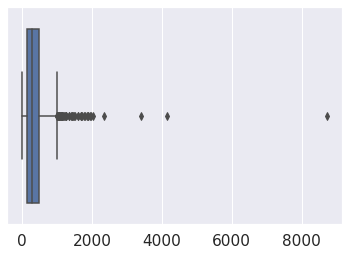

In [63]:
# Box plot for 

import seaborn as sns
sns.boxplot(x= fp)


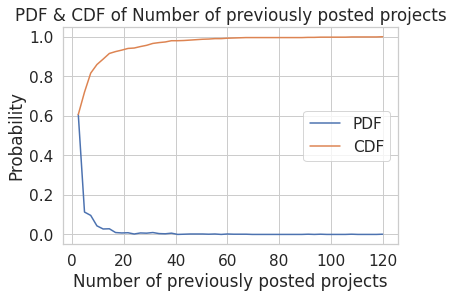

In [64]:
import numpy as np
count, bin_edge = np.histogram(project,bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)

plt.xlabel('Number of previously posted projects')
plt.ylabel('Probability')
plt.title('PDF & CDF of Number of previously posted projects')
plt.legend(('PDF','CDF'))

In [65]:
essay = x_test['essay'].values.reshape(-1,1)

false_essay=[]            # price at false positive data points 
for i in fpr:
    f = essay[i]
    false_essay.append(f)

print(len(false_essay))

f_essay = np.array(false_essay) # since either list of arrrays or dataframe can only be given as data in seaborn


946


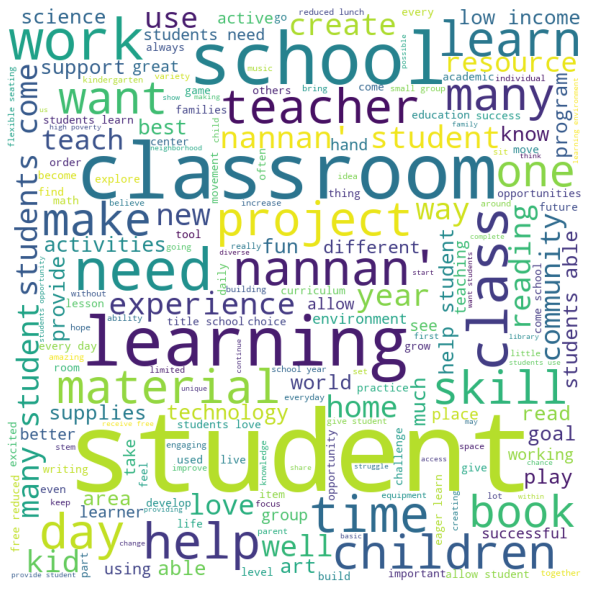

In [66]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in f_essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# <font color='red'> <b>Task - 2</b></font>

In [ ]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.


In [ ]:
# Tabulate your results

# Model -3
# Hyper-parameter tuning on tfidf dataset with selecting all non-zero features

In [67]:
# parameters were taken from 1st hypermater tunong model

dt3 = DecisionTreeClassifier(class_weight='balanced',max_depth =18, min_samples_split =94)
dt3.fit(x_tr_tf, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=18,
                       min_samples_split=94)

In [68]:
# selecting features with zero importance

important = dt3.feature_importances_
feature_indices = np.where(important !=0)[0]


In [69]:
x_tr_tf_new = x_tr_tf[:,feature_indices]
x_cv_tf_new = x_cv_tf[:,feature_indices]
x_te_tf_new = x_te_tf[:,feature_indices]

In [70]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model_params = {'max_depth': randint(4,100), 'min_samples_split': randint(4, 50)}
dt = DecisionTreeClassifier(class_weight='balanced')
#parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split':[5, 10, 15]}
clf3= RandomizedSearchCV(dt, model_params, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf3.fit(x_tr_tf_new, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6a8a56850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6ab6853d0>},
                   return_train_score=True, scoring='roc_auc')

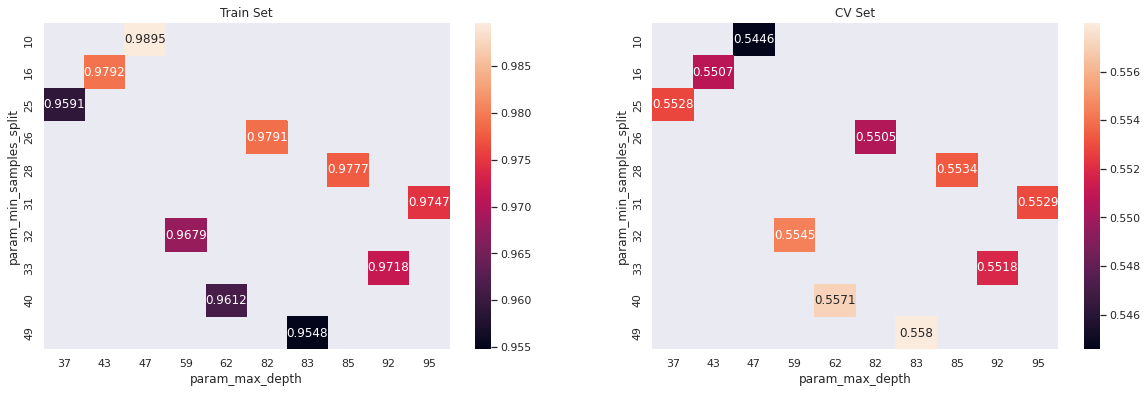

In [71]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf3.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [72]:
# Print params
print(clf3.best_estimator_)
print(clf3.score(x_tr_tf_new, y_train))
print(clf3.score(x_cv_tf_new, y_cv))

DecisionTreeClassifier(class_weight='balanced', max_depth=83,
                       min_samples_split=49)
0.9638284194853152
0.5458935820246162


In [74]:
from scipy.sparse import vstack # for vertical stacking
x3 = vstack((x_tr_tf_new,x_cv_tf_new)).tocsr()
print(x3.shape)
print(y_train_1.shape)


(37500, 265)
(37500,)


In [77]:
# parameters were taken from 1st hypermater tunong model

dt4 = DecisionTreeClassifier(class_weight='balanced',max_depth =83, min_samples_split =49)
dt4.fit(x3, y_train_1)

DecisionTreeClassifier(class_weight='balanced', max_depth=83,
                       min_samples_split=49)

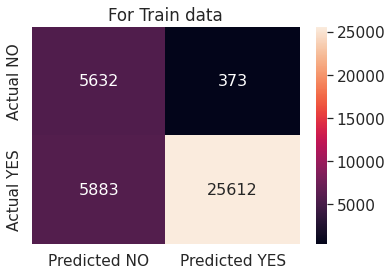

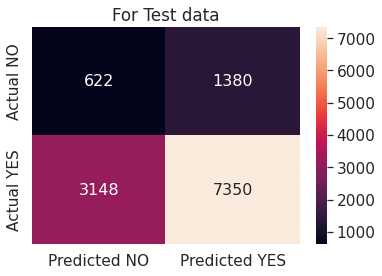

In [78]:
# Confusion Matrix

get_confusion_matrix(dt4,x3,y_train_1)
plt.title('For Train data')
plt.show()
get_confusion_matrix(dt4,x_te_tf_new,y_test)
plt.title('For Test data')
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_3 = dt4.predict_proba(x_te_tf_new)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_3[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.5086925362692176


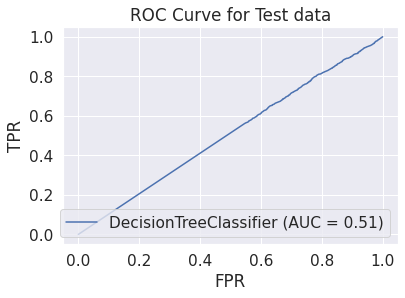

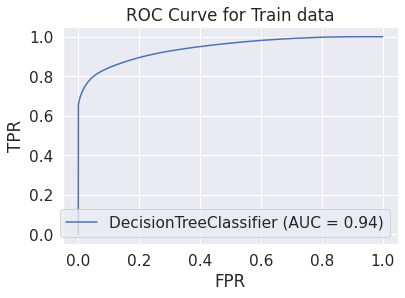

In [80]:
from sklearn import metrics

metrics.plot_roc_curve(dt4, x_te_tf_new, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(dt4, x3, y_train_1)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# To get false positive data points

In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_3[:,1])

predictions = collect_prediction(pred_prob_3[:,1], thresholds, fpr, tpr)
print(len(predictions))

y_te = y_test.values.reshape(-1,1)

fpr = collect_fpr(y_te, predictions)
len(fpr)

price = x_test['price'].values.reshape(-1,1)

false_price=[]            # price at false positive data points 
for i in fpr:
    f = price[i]
    false_price.append(f)

print(len(false_price))

fp = np.array(false_price) # since either list of arrrays or dataframe can only be given as data in seaborn


n_project = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

false_projects=[]            # 'teacher_number_of_previously_posted_projects' at false positive data points 
for i in fpr:
    p = n_project[i]
    false_projects.append(p)

project = np.array(false_projects) # since either list of arrrays or dataframe can only be given as data in seaborn



12500
1115


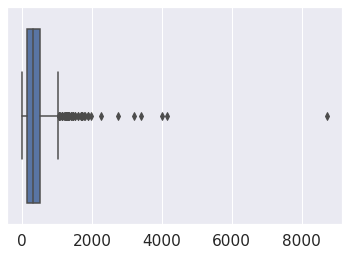

In [82]:
# Box plot for 

import seaborn as sns
sns.boxplot(x= fp)


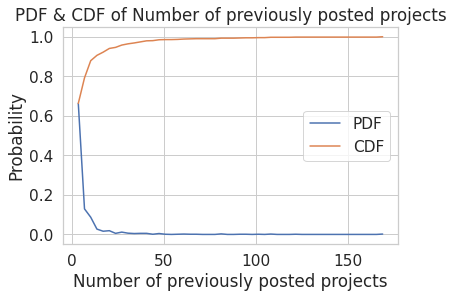

In [83]:
import numpy as np
count, bin_edge = np.histogram(project,bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)

plt.xlabel('Number of previously posted projects')
plt.ylabel('Probability')
plt.title('PDF & CDF of Number of previously posted projects')
plt.legend(('PDF','CDF'))

In [84]:
essay = x_test['essay'].values.reshape(-1,1)

false_essay=[]            # price at false positive data points 
for i in fpr:
    f = essay[i]
    false_essay.append(f)

print(len(false_essay))

f_essay = np.array(false_essay) # since either list of arrrays or dataframe can only be given as data in seaborn


1115


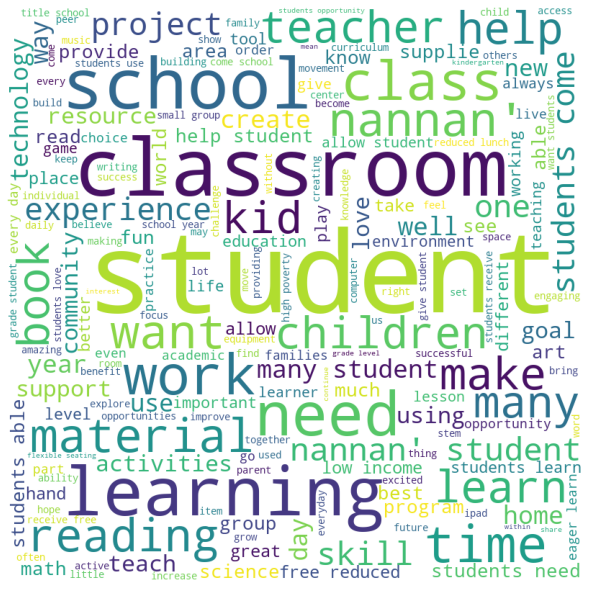

In [85]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in f_essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Model -4
# Hyper-parameter tuning on tfidf weighted w2vec dataset with selecting all non-zero features

In [86]:
# parameters were taken from 2nd hypermater tuning model

dt5 = DecisionTreeClassifier(class_weight='balanced',max_depth =66, min_samples_split =81)
dt5.fit(x_tr_tf_w2vec, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=66,
                       min_samples_split=81)

In [87]:
# selecting features with zero importance

important = dt5.feature_importances_
feature_indices = np.where(important !=0)[0]


In [88]:
x_tr_tf_w2vec_new = x_tr_tf_w2vec[:,feature_indices]
x_cv_tf_w2vec_new = x_cv_tf_w2vec[:,feature_indices]
x_te_tf_w2vec_new = x_te_tf_w2vec[:,feature_indices]

In [89]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve, RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

model_params = {'max_depth': randint(4,100), 'min_samples_split': randint(4, 50)}
dt = DecisionTreeClassifier(class_weight='balanced')
#parameters = {'max_depth':[1, 5, 10, 50, 100], 'min_samples_split':[5, 10, 15]}
clf4= RandomizedSearchCV(dt, model_params, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
clf4.fit(x_tr_tf_w2vec_new, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6abe0bd90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fc6ab73fdd0>},
                   return_train_score=True, scoring='roc_auc')

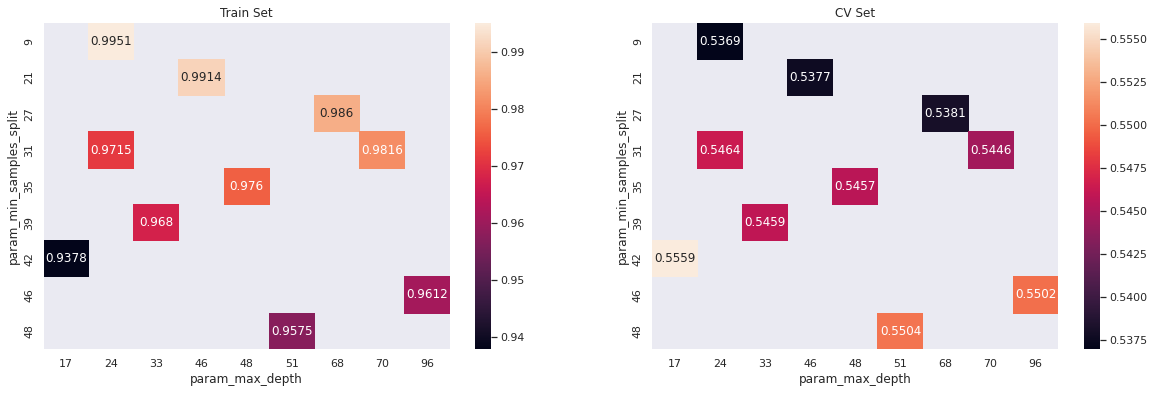

In [90]:
# Find best hyper parameter max_depth and min_samples_split
import seaborn as sns; sns.set()
max_scores = pd.DataFrame(clf4.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_scores.mean_train_score, annot = True, fmt='.4g', ax=ax[0])
sns.heatmap(max_scores.mean_test_score, annot = True, fmt='.4g', ax=ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

In [91]:
# Print params
print(clf4.best_estimator_)
print(clf4.score(x_tr_tf_w2vec_new, y_train))
print(clf4.score(x_cv_tf_w2vec_new, y_cv))

DecisionTreeClassifier(class_weight='balanced', max_depth=17,
                       min_samples_split=42)
0.932826761239921
0.5474405316082984


In [92]:
from scipy.sparse import vstack # for vertical stacking
x4 = vstack((x_tr_tf_w2vec_new,x_cv_tf_w2vec_new)).tocsr()
print(x4.shape)
print(y_train_1.shape)


(37500, 297)
(37500,)


In [93]:
# parameters were taken from hypermater tuning model

dt6 = DecisionTreeClassifier(class_weight='balanced',max_depth =17, min_samples_split =42)
dt6.fit(x4, y_train_1)

DecisionTreeClassifier(class_weight='balanced', max_depth=17,
                       min_samples_split=42)

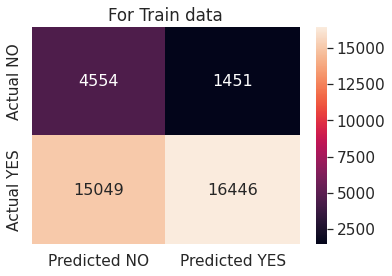

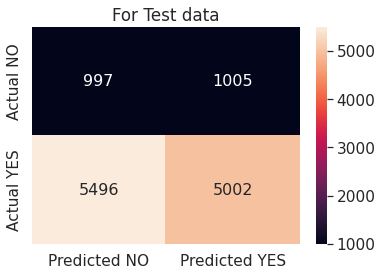

In [94]:
# Confusion Matrix

get_confusion_matrix(dt6,x4,y_train_1)
plt.title('For Train data')
plt.show()

get_confusion_matrix(dt6,x_te_tf_w2vec_new,y_test)
plt.title('For Test data')
plt.show()

In [95]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_4 = dt6.predict_proba(x_te_tf_w2vec_new)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_4[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.49353213941706986


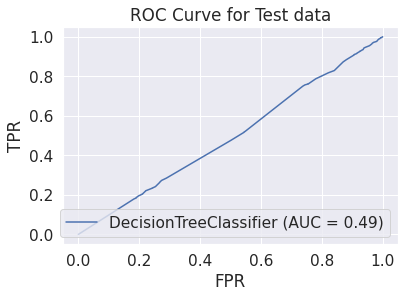

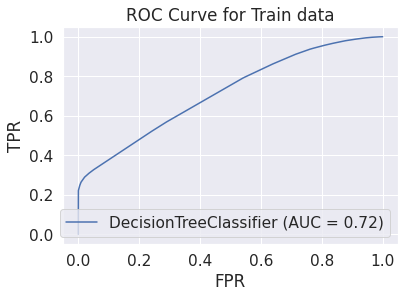

In [96]:
from sklearn import metrics

metrics.plot_roc_curve(dt6, x_te_tf_w2vec_new, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(dt6, x4, y_train_1)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# To get false positive data points

In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_4[:,1])

predictions = collect_prediction(pred_prob_4[:,1], thresholds, fpr, tpr)
print(len(predictions))

y_te = y_test.values.reshape(-1,1)

fpr = collect_fpr(y_te, predictions)
len(fpr)

price = x_test['price'].values.reshape(-1,1)

false_price=[]            # price at false positive data points 
for i in fpr:
    f = price[i]
    false_price.append(f)

print(len(false_price))

fp = np.array(false_price) # since either list of arrrays or dataframe can only be given as data in seaborn


n_project = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

false_projects=[]            # 'teacher_number_of_previously_posted_projects' at false positive data points 
for i in fpr:
    p = n_project[i]
    false_projects.append(p)

project = np.array(false_projects) # since either list of arrrays or dataframe can only be given as data in seaborn



12500
1090


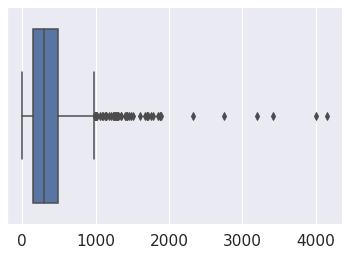

In [98]:
# Box plot for 

import seaborn as sns
sns.boxplot(x= fp)


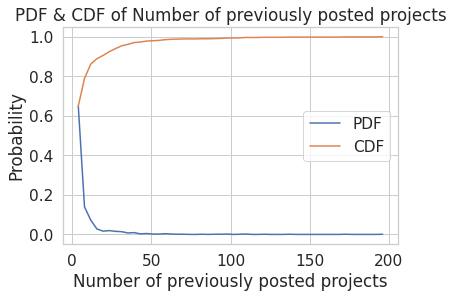

In [99]:
import numpy as np
count, bin_edge = np.histogram(project,bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)

plt.xlabel('Number of previously posted projects')
plt.ylabel('Probability')
plt.title('PDF & CDF of Number of previously posted projects')
plt.legend(('PDF','CDF'))

In [100]:
essay = x_test['essay'].values.reshape(-1,1)

false_essay=[]            # price at false positive data points 
for i in fpr:
    f = essay[i]
    false_essay.append(f)

print(len(false_essay))

f_essay = np.array(false_essay) # since either list of arrrays or dataframe can only be given as data in seaborn


1090


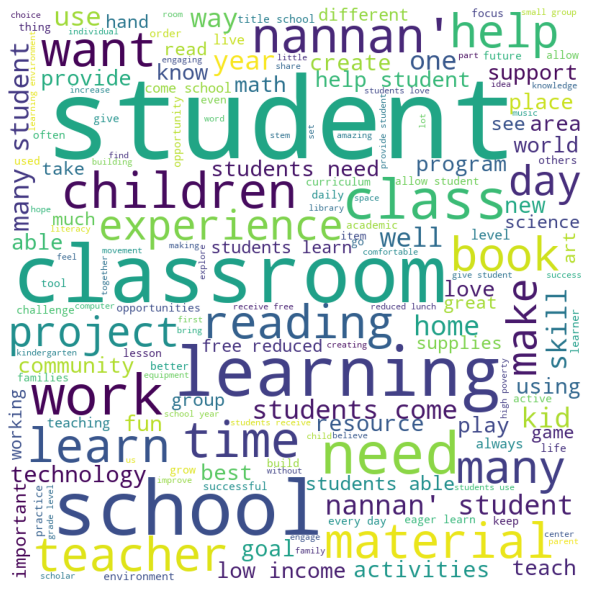

In [101]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in f_essay:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Observations

- There is no significant increase or change in the AUC_score in any model.

In [102]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Feature Importance", "Depth of tree", "Minimum splits", "AUC Score"]
table.add_row(["TFIDF", "Decision Tree","No", 18, 94, 0.496])
table.add_row(["TFIDF", "Decision Tree","Yes", 83, 49, 0.5])
table.add_row(["TFIDF_W2VEC", "Decision Tree","No", 66, 81, 0.49])
table.add_row(["TFIDF_W2VEC", "Decision Tree","Yes", 17, 42, 0.493])

print(table)

+-------------+---------------+--------------------+---------------+----------------+-----------+
|  Vectorizer |     Model     | Feature Importance | Depth of tree | Minimum splits | AUC Score |
+-------------+---------------+--------------------+---------------+----------------+-----------+
|    TFIDF    | Decision Tree |         No         |       18      |       94       |   0.496   |
|    TFIDF    | Decision Tree |        Yes         |       83      |       49       |    0.5    |
| TFIDF_W2VEC | Decision Tree |         No         |       66      |       81       |    0.49   |
| TFIDF_W2VEC | Decision Tree |        Yes         |       17      |       42       |   0.493   |
+-------------+---------------+--------------------+---------------+----------------+-----------+
